<a href="https://colab.research.google.com/github/ShorouqTelfah/ShorouqTelfah/blob/main/pre_processing_and_spliting_vindr_mammo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

save_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/"

# List all files in the folder
files = [f for f in os.listdir(save_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Total preprocessed images: {len(files)}")


Total preprocessed images: 16000


In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

csv_path = "/content/drive/MyDrive/VinDr_mammo.png/training_samples.csv"
save_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/"
os.makedirs(save_folder, exist_ok=True)
df = pd.read_csv(csv_path)

TARGET_SIZE = (224, 224)

for idx, row in df.iterrows():
    img_path = row['image_path_in_zip']
    filename = os.path.basename(img_path)
    save_path = os.path.join(save_folder, filename)

    # Skip if already processed
    if os.path.exists(save_path):
        continue

    try:
        # Try opening image
        img = Image.open(img_path)
        img = img.convert('L')  # grayscale

        # Resize
        img_resized = img.resize(TARGET_SIZE)

        # Normalize + save
        img_array = np.array(img_resized) / 255.0
        img_final = Image.fromarray((img_array * 255).astype(np.uint8))
        img_final.save(save_path)

        if idx % 100 == 0:
            print(f"Processed {idx} images...")

    except Exception as e:
        print(f"⚠️ Skipped {img_path}: {e}")
        continue

print("✅ Preprocessing complete (skipped slow or corrupted images).")


Processed 14400 images...
Processed 14500 images...
Processed 14600 images...
Processed 14700 images...
Processed 14800 images...
Processed 14900 images...
Processed 15000 images...
Processed 15100 images...
Processed 15200 images...
Processed 15300 images...
Processed 15400 images...
Processed 15500 images...
Processed 15600 images...
Processed 15700 images...
Processed 15800 images...
Processed 15900 images...
✅ Preprocessing complete (skipped slow or corrupted images).


explore and preprocess the test image and save them

In [ ]:
import pandas as pd

# Path to your test CSV file
test_output_path = "/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv"

# Read the CSV file
test_df = pd.read_csv(test_output_path)

# Show first few rows
print(test_df.head())

# Show number of rows and columns
print("\n✅ File loaded successfully!")
print(f"Rows: {len(test_df)}, Columns: {len(test_df.columns)}")

# (Optional) list the column names
print("\nColumns:", test_df.columns.tolist())

                           study_id                         series_id  \
0  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
1  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
2  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
3  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
4  229b0c72152c8c7c6cd902876046c795  ba77420116a36fd24c151e4294114ab3   

                           image_id laterality view_position  height  width  \
0  04c9b9305ae9a552975cceab2c15632e          L            CC    3518   2800   
1  a0b73dcf1c300988780abb9abe55826d          L           MLO    3518   2800   
2  8132013f5158a2bc93d77ea9200c75d8          R            CC    3518   2800   
3  09c140f91b2da7c7ff024e5f4b2d5599          R           MLO    3518   2800   
4  b045e8b4cbcacce80adb90ee8a9f885a          L            CC    3518   2800   

  breast_birads breast_density split  ... Window Center  Window Width  \
0     BI-RADS

In [ ]:

import pandas as pd
import os

csv_path = "/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv"
df = pd.read_csv(csv_path)

# Check first 5 image paths
print(df['image_path_in_zip'].head())

# Check if the first few image files actually exist
for path in df['image_path_in_zip'].head(10):
    if os.path.exists(path):
        print(f"✅ Found: {path}")
    else:
        print(f"❌ Not found: {path}")


0    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
1    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
2    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
3    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
4    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
Name: image_path_in_zip, dtype: object
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/04c9b9305ae9a552975cceab2c15632e.png
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/a0b73dcf1c300988780abb9abe55826d.png
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/8132013f5158a2bc93d77ea9200c75d8.png
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/09c140f91b2da7c7ff024e5f4b2d5599.png
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/229b0c72152c8c7c6cd902876046c795/b045e8b4cbcacce80adb90ee8a9f

In [ ]:
from PIL import Image

# Take first 5 images as example
for path in df['image_path_in_zip'].head(5):
    img = Image.open(path)
    print(f"Image: {path}")
    print(f"  Size (width x height): {img.size}")
    print(f"  Mode (channels): {img.mode}")  # 'L' = grayscale, 'RGB' = color
    print()

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/04c9b9305ae9a552975cceab2c15632e.png
  Size (width x height): (912, 1520)
  Mode (channels): L

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/a0b73dcf1c300988780abb9abe55826d.png
  Size (width x height): (912, 1520)
  Mode (channels): L

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/8132013f5158a2bc93d77ea9200c75d8.png
  Size (width x height): (912, 1520)
  Mode (channels): L

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/09c140f91b2da7c7ff024e5f4b2d5599.png
  Size (width x height): (912, 1520)
  Mode (channels): L

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/229b0c72152c8c7c6cd902876046c795/b045e8b4cbcacce80adb90ee8a9f885a.png
  Size (width x height): (912, 1520)
  Mode (channels): L



In [ ]:
import numpy as np

for path in df['image_path_in_zip'].head(5):
    img = Image.open(path)
    arr = np.array(img)
    print(f"Image: {path}")
    print(f"  Min pixel value: {arr.min()}")
    print(f"  Max pixel value: {arr.max()}")
    print()

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/04c9b9305ae9a552975cceab2c15632e.png
  Min pixel value: 0
  Max pixel value: 224

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/a0b73dcf1c300988780abb9abe55826d.png
  Min pixel value: 0
  Max pixel value: 228

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/8132013f5158a2bc93d77ea9200c75d8.png
  Min pixel value: 0
  Max pixel value: 232

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/09c140f91b2da7c7ff024e5f4b2d5599.png
  Min pixel value: 0
  Max pixel value: 226

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/229b0c72152c8c7c6cd902876046c795/b045e8b4cbcacce80adb90ee8a9f885a.png
  Min pixel value: 0
  Max pixel value: 190



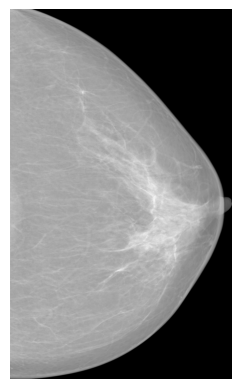

In [ ]:
import matplotlib.pyplot as plt

img = Image.open(df['image_path_in_zip'].iloc[0])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# -----------------------------
# Paths
# -----------------------------
csv_path = "/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv"
save_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_test_images/"

# Create folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# Load CSV
df = pd.read_csv(csv_path)

# Fixed size for CNN input
TARGET_SIZE = (224, 224)  # (width, height)

# -----------------------------
# Process each image
# -----------------------------
for idx, row in df.iterrows():
    img_path = row['image_path_in_zip']
    filename = os.path.basename(img_path)
    save_path = os.path.join(save_folder, filename)

    # ✅ Skip if already processed
    if os.path.exists(save_path):
        continue

    try:
        # Open image
        img = Image.open(img_path).convert('L')  # ensure grayscale

        # Resize
        img_resized = img.resize(TARGET_SIZE)

        # Normalize pixels to [0,1]
        img_array = np.array(img_resized) / 255.0

        # Convert back to PIL image for saving
        img_final = Image.fromarray((img_array * 255).astype(np.uint8))

        # Save with same filename in new folder
        img_final.save(save_path)

        if idx % 500 == 0:
            print(f"Processed {idx} images...")

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

print("✅ Preprocessing complete (skipped existing images).")
print(f"All preprocessed images saved in: {save_folder}")


Processed 0 images...
Processed 500 images...
Processed 1000 images...
Processed 1500 images...
Processed 2000 images...
Processed 2500 images...
Processed 3000 images...
Processed 3500 images...
✅ Preprocessing complete (skipped existing images).
All preprocessed images saved in: /content/drive/MyDrive/VinDr_mammo.png/preprocessed_test_images/


In [3]:
import os
test_image = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_test_images/"

# List all files in the folder
files = [f for f in os.listdir(test_image) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Total preprocessed images: {len(files)}")

Total preprocessed images: 4000


In [17]:
import os
import pandas as pd

# Paths
csv_path = "/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv"
preprocessed_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_test_images/"

# Load the CSV
df = pd.read_csv(csv_path)

In [18]:
df.shape

(4000, 32)

In [6]:
# Add new column for preprocessed images
df['preprocessed_path'] = df['image_path_in_zip'].apply(
    lambda x: os.path.join(preprocessed_folder, os.path.basename(x))
)

In [7]:
df.shape

(4000, 32)

In [8]:
# ✅ Save it back to the same CSV file (overwriting)
df.to_csv(csv_path, index=False)

print("✅ Added 'preprocessed_path' column and saved to the same CSV file!")
print(df.head())

✅ Added 'preprocessed_path' column and saved to the same CSV file!
                           study_id                         series_id  \
0  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
1  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
2  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
3  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
4  229b0c72152c8c7c6cd902876046c795  ba77420116a36fd24c151e4294114ab3   

                           image_id laterality view_position  height  width  \
0  04c9b9305ae9a552975cceab2c15632e          L            CC    3518   2800   
1  a0b73dcf1c300988780abb9abe55826d          L           MLO    3518   2800   
2  8132013f5158a2bc93d77ea9200c75d8          R            CC    3518   2800   
3  09c140f91b2da7c7ff024e5f4b2d5599          R           MLO    3518   2800   
4  b045e8b4cbcacce80adb90ee8a9f885a          L            CC    3518   2800   

  breast_birads bre

same for thraining

In [19]:
import os
import pandas as pd

# Paths
csv_path = "/content/drive/MyDrive/VinDr_mammo.png/training_samples.csv"
save_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/"

# Load CSV
df = pd.read_csv(csv_path)

In [20]:
df.shape

(16000, 32)

In [21]:
# Add new column for preprocessed paths
df['preprocessed_path'] = df['image_path_in_zip'].apply(
    lambda x: os.path.join(save_folder, os.path.basename(x))
)

# Save updated CSV
df.to_csv(csv_path, index=False)

In [22]:
df.shape

(16000, 32)

In [23]:
print("✅ Added 'preprocessed_path' column to training_samples.csv")
print("Sample rows:")
print(df[['image_path_in_zip', 'preprocessed_path']].head())

✅ Added 'preprocessed_path' column to training_samples.csv
Sample rows:
                                   image_path_in_zip  \
0  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   
1  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   
2  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   
3  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   
4  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   

                                   preprocessed_path  
0  /content/drive/MyDrive/VinDr_mammo.png/preproc...  
1  /content/drive/MyDrive/VinDr_mammo.png/preproc...  
2  /content/drive/MyDrive/VinDr_mammo.png/preproc...  
3  /content/drive/MyDrive/VinDr_mammo.png/preproc...  
4  /content/drive/MyDrive/VinDr_mammo.png/preproc...  


In [24]:
df.shape

(16000, 32)

split the training to validation and training split not stratified by birads but considered the natural distribution of age and density

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Paths
csv_path = "/content/drive/MyDrive/VinDr_mammo.png/training_samples.csv"
save_folder = "/content/drive/MyDrive/VinDr_mammo.png/"

# Load CSV
df = pd.read_csv(csv_path)

In [26]:
df.columns

Index(['study_id', 'series_id', 'image_id', 'laterality', 'view_position',
       'height', 'width', 'breast_birads', 'breast_density', 'split',
       'Series Instance UID', 'Patient's Age', 'View Position',
       'Image Laterality', 'Photometric Interpretation', 'Rows', 'Columns',
       'Imager Pixel Spacing', 'Pixel Spacing', 'Pixel Padding Value',
       'Pixel Padding Range Limit', 'Window Center', 'Window Width',
       'Rescale Intercept', 'Rescale Slope', 'Rescale Type',
       'Window Center & Width Explanation', 'Manufacturer',
       'Manufacturer's Model Name', 'Age Group', 'image_path_in_zip',
       'preprocessed_path'],
      dtype='object')

In [27]:
# Columns for reference
age_column = "Patient's Age"           # update if different
density_column = "breast_density"      # update if different
birads_column = 'breast_birads'              # update if different

# --- Random 80/20 split (no stratification)
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# --- Save the split CSVs
train_csv_path = os.path.join(save_folder, "training_split.csv")
val_csv_path = os.path.join(save_folder, "validation_split.csv")

In [28]:
# Check the shape (number of rows and columns) of the split CSVs
print(f"Training set shape: {train_df.shape}")      # (rows, columns)
print(f"Validation set shape: {val_df.shape}")     # (rows, columns)


Training set shape: (12800, 32)
Validation set shape: (3200, 32)
